In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from src.db import get_dataframe
import pandas as pd
# Add description here
#
# *Note:* You can open this file as a notebook (JupyterLab: right-click on it in the side bar -> Open With -> Notebook)

In [2]:
# Uncomment the next two lines to enable auto reloading for imported modules
# %load_ext autoreload
# %autoreload 2
# For more info, see:
# https://docs.ploomber.io/en/latest/user-guide/faq_index.html#auto-reloading-code-in-jupyter

In [3]:
# If this task has dependencies, list them them here
# (e.g. upstream = ['some_task']), otherwise leave as None.
upstream = ['s01_get']

# This is a placeholder, leave it as None
product = None
table_name = None

In [4]:
# Parameters
table_name = "house_prices"
upstream = {"s01_get": {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/products/01-extract-pipeline.ipynb", "csv_file": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/data/house_prices_raw.csv", "database": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/data/house_prices.duckdb"}}
product = {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/house_pricing/products/03-eda.ipynb"}


In [5]:
db_file = upstream['s01_get']['database']
df = get_dataframe(duckdb_file=db_file, table_name=table_name)

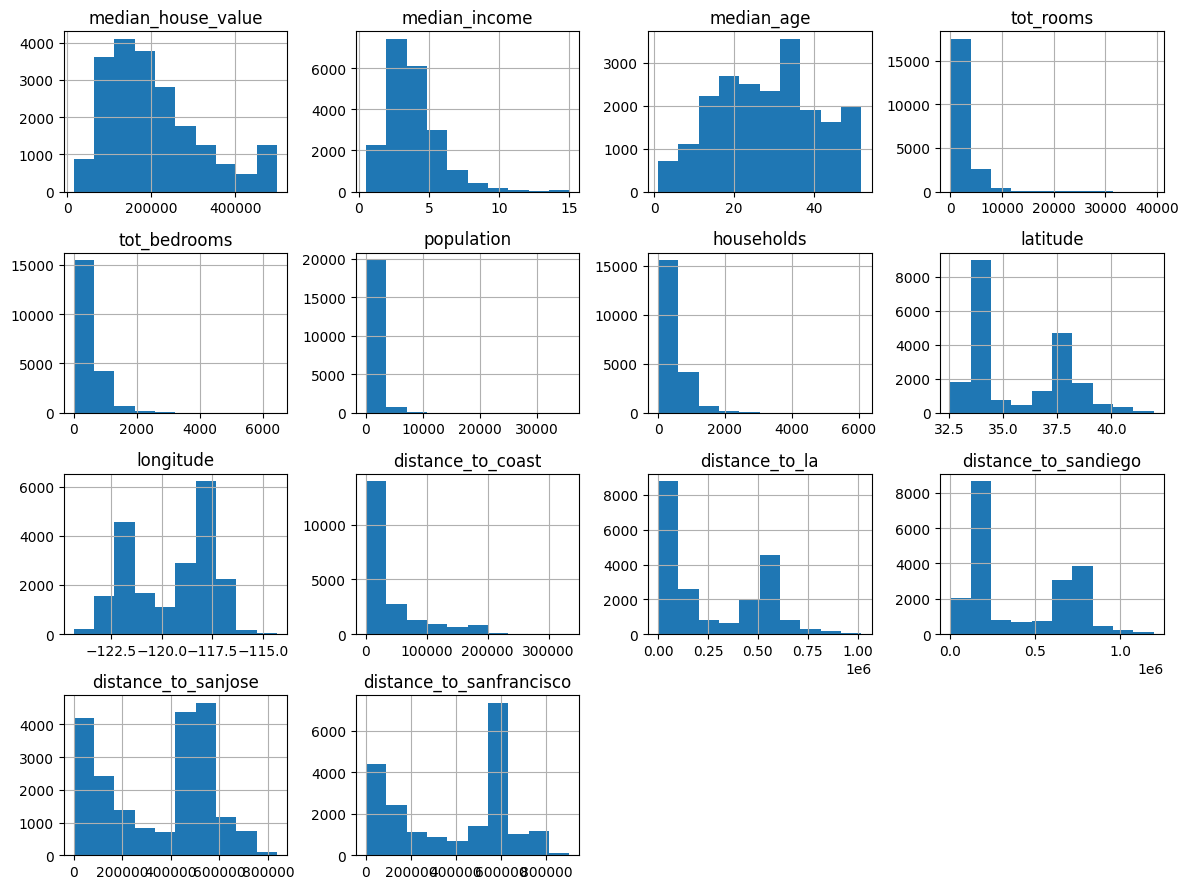

In [6]:
df.hist(figsize=(12, 9))
plt.tight_layout()
plt.show()

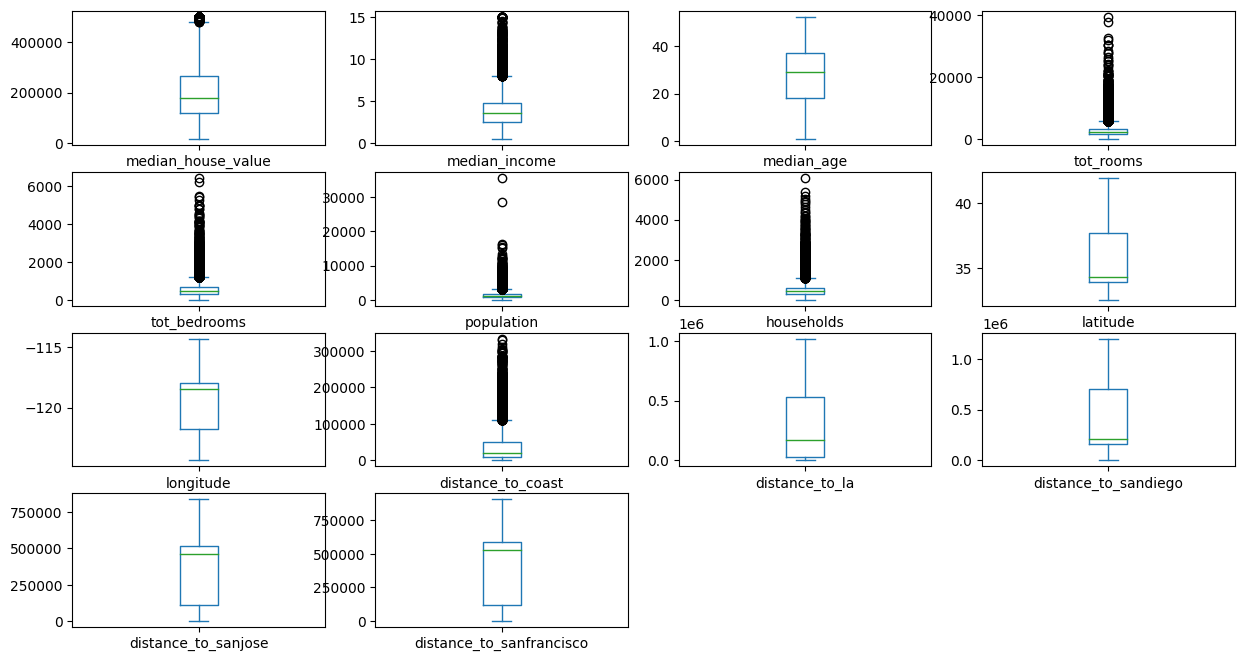

In [7]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,8))
plt.title('Box-plot of Features')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [9]:
# --Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_x = X.copy()
vif_df["feature"] = vif_x.columns
vif_df["VIF"] = [variance_inflation_factor(vif_x.values, i)
                 for i in range(len(vif_x.columns))]

vif_df.head(10)

,feature,VIF
0,median_income,9.257934
1,median_age,8.691127
2,tot_rooms,31.820247
3,tot_bedrooms,94.889267
4,population,16.784018
5,households,95.122998
6,latitude,30397.216983
7,longitude,25552.974794
8,distance_to_coast,6.327481
9,distance_to_la,30.738008
